In [1]:
include("src/PlotFunctions.jl")




Dict{String, IntegrationParameters} with 4 entries:
  "slow"      => IntegrationParameters(1000, 0.02)
  "fast"      => IntegrationParameters(100, 0.05)
  "very_slow" => IntegrationParameters(10000, 0.02)
  "very_fast" => IntegrationParameters(10, 0.1)

In [106]:

A_ππ00 = [ 0 0 0 π ; 0 0 0 0; 0 0 0 π; 0 0 0 0 ]


Jpm = -0.025

# phase transition 0-> ππ00 is at B = √(9/5 * -Jpm) 
Bmin =sqrt(-9*Jpm/5)
println("minimum B = ",Bmin)

magnetic_fields = vcat(
    [B0*[1,1,0]/sqrt(2)  for B0 in (Bmin, Bmin+0.1, Bmin+0.2,Bmin+0.3)],
    [B0*[0,1,1]/sqrt(2)  for B0 in (Bmin, Bmin+0.1, Bmin+0.2,Bmin+0.3)] 
    )

simlist = []
for b in magnetic_fields
    push!(simlist,
        SimulationParameters("pipi00", A=A_ππ00, Jpm=Jpm, B=b, nsample=100000, kappa=2.0)
        )
end

minimum B = 0.21213203435596426


In [107]:

Egrid = collect(range(0,3,150))

figure_dir = "figures/"

path_sp = generate_path(geom.high_symmetry_points, 
    split("\\Gamma X W K \\Gamma L U W"), points_per_unit=190, K_units=4π/8)



BZPath([0.0, 2.942889045194777e-16, 0.008267349088394485, 0.016534698176788674, 0.024802047265182866, 0.03306939635357706, 0.041336745441971245, 0.04960409453036544, 0.05787144361875963, 0.06613879270715382  …  7.380852080542837, 7.389119429631232, 7.397386778719626, 7.40565412780802, 7.413921476896414, 7.422188825984809, 7.4304561750732026, 7.438723524161597, 7.446990873249991, 7.455258222338385], [[0.0, 0.0, 0.0], [3.487868498008632e-16, 0.0, 0.0], [0.008267349088394566, 0.0, 0.0], [0.016534698176788612, 0.0, 0.0], [0.024802047265182828, 0.0, 0.0], [0.033069396353577044, 0.0, 0.0], [0.041336745441971266, 0.0, 0.0], [0.04960409453036548, 0.0, 0.0], [0.0578714436187597, 0.0, 0.0], [0.06613879270715374, 0.0, 0.0]  …  [1.5707963267948966, 0.7327850759718887, 0.05261308742555959], [1.5707963267948966, 0.7386309745747286, 0.04676718882271963], [1.5707963267948966, 0.7444768731775686, 0.04092129021987967], [1.5707963267948966, 0.7503227717804085, 0.035075391617039764], [1.5707963267948966, 

In [5]:

println("Plotting spinon dispersions...")
# plot the spinons
@showprogress for sim in simlist
    p = plot_spinons(sim,path_sp)
    savefig(p, figure_dir*"spinon_dispersion"*sim_identifier(sim)*".pdf")
end

Plotting spinon dispersions...


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


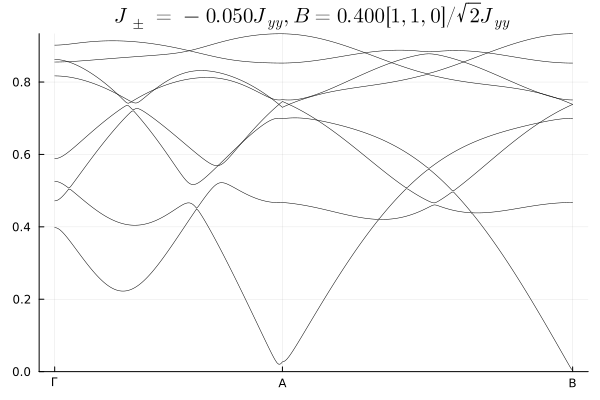

In [105]:
sp = Dict(
    "\\Gamma"=>[0.,0.,0.],
    "A"=>[0.588506637316513, 0.6078631332893559, 0.18779963487997764],
    "B"=>[-π/16, 3π/16,-3π/16]
    )

pfad = generate_path(sp, 
    split("\\Gamma A B"), points_per_unit=150, K_units=1)

sim2 = SimulationParameters(simlist[2], 1e-5)
0
plot_spinons(sim2,pfad)

In [9]:
ip = integration_settings["very_fast"]

path_spec = generate_path(geom.high_symmetry_points, 
    split("\\Gamma X W K \\Gamma L U W"), points_per_unit=50, K_units=4π/8)




BZPath([0.0, 0.0, 0.031415926535897934, 0.06283185307179587, 0.09424777960769379, 0.12566370614359174, 0.15707963267948966, 0.18849555921538758, 0.21991148575128552, 0.25132741228718347  …  7.172514883515304, 7.203930810051202, 7.2353467365871, 7.266762663122997, 7.298178589658896, 7.329594516194794, 7.3610104427306915, 7.392426369266589, 7.423842295802487, 7.455258222338385], [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.031415926535897934, 0.0, 0.0], [0.06283185307179587, 0.0, 0.0], [0.09424777960769379, 0.0, 0.0], [0.12566370614359174, 0.0, 0.0], [0.15707963267948966, 0.0, 0.0], [0.18849555921538758, 0.0, 0.0], [0.21991148575128555, 0.0, 0.0], [0.25132741228718347, 0.0, 0.0]  …  [1.5707963267948966, 0.5854684311803218, 0.1999297322171265], [1.5707963267948966, 0.6076828458711137, 0.17771531752633465], [1.5707963267948966, 0.6298972605619054, 0.15550090283554283], [1.5707963267948966, 0.6521116752526973, 0.13328648814475097], [1.5707963267948966, 0.6743260899434891, 0.1110720734539592], [1.5

In [ ]:

println("Calculating spectral weight data...")
datafiles = []
# run the simulation
for (j,sim) in enumerate(simlist)
    sim2 = SimulationParameters(sim, 0.002)
    @printf("Running simulation %d of %d\n", j, length(simlist))
    f = calc_spectral_weight_along_path(sim2, ip, Egrid, path_spec, figure_dir)
    push!(datafiles, f)
end

In [25]:

println("Plotting the spectral weights")
for specweight_data in datafiles
    data = load(specweight_data)
    p = plot_spectral_weight(data)
    sim = SimulationParameters(data["physical_parameters"])
    savefig(p, figure_dir*"spectral_weight"*sim_identifier(sim)*".pdf")
end

println("Calculating the averaged spectral weight")


Plotting the spectral weights
Calculating the averaged spectral weight


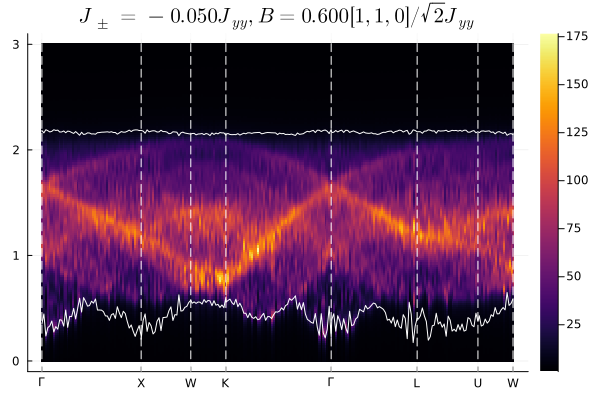

In [28]:
plot_spectral_weight(load(datafiles[4]))

In [21]:
using Profile
using BenchmarkTools
@benchmark spinon_dispersion( SVector{3}([0.,0.,0.]), simlist[1])

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  286.166 μs …  1.858 ms  ┊ GC (min … max): 0.00% … 61.53%
 Time  (median):     297.166 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   305.672 μs ± 69.919 μs  ┊ GC (mean ± σ):  0.86% ±  3.26%

   ▃▅██▇▆▆▆▅▅▄▄▄▃▃▂▂▂▂▁▂▁▁ ▁                                   ▃
  ███████████████████████████▇█▇██▇▇▇▆▇▆▆▆▅▆▆▆▃▃▆▅▄▅▅▃▄▁▅▅▁▄▁▅ █
  286 μs        Histogram: log(frequency) by time       399 μs <

 Memory estimate: 106.84 KiB, allocs estimate: 3081.

In [ ]:
# that was around 297 uS

In [33]:
@time spectral_weight( SVector{3}([2.,1.,2.]), Egrid, simlist[1], integration_settings["fast"])


  0.336400 seconds (3.03 M allocations: 271.817 MiB, 17.75% gc time)


(ComplexF64[11.006798794208116 - 3.693258270092092e-17im, 11.504337099097112 - 3.775498898206833e-17im, 12.03869522942696 - 3.832430541826136e-17im, 12.613850626277484 - 3.8486592030532384e-17im, 13.234369333884132 - 3.79968830378684e-17im, 13.905520446242642 - 3.6451832353643206e-17im, 14.633418906800294 - 3.315778162788205e-17im, 15.42520539749357 - 2.6854109038072824e-17im, 16.28927533656445 - 1.508369809918019e-17im, 17.235573769000617 + 7.387604330157188e-18im  …  3.970883231538295 - 2.006625572657062e-18im, 3.8739360754707133 - 2.0240772989376085e-18im, 3.7805732200012665 - 2.038575017031292e-18im, 3.690616439639852 - 2.050371900410906e-18im, 3.6038986688941614 - 2.0596991753747243e-18im, 3.5202631587454167 - 2.0667681986463816e-18im, 3.4395627078210085 - 2.0717723174166316e-18im, 3.3616589606857743 - 2.0748885369819166e-18im, 3.2864217665390765 - 2.076279017939953e-18im, 3.2137285923614787 - 2.076092422155652e-18im], ComplexF64[-0.6229107590709787 - 0.3381059522886871im, -0.6691

In [39]:
@pprof spectral_weight( SVector{3}([2.,1.,2.]), Egrid, simlist[1], integration_settings["fast"])

"profile.pb.gz"

Main binary filename not available.
Serving web UI on http://localhost:57599


In [25]:
Profile.Allocs.print()

In [33]:
using Profile
using BenchmarkTools

In [29]:
lat = geom.PyroFCC(30)

Main.SpinonStructure.PyrochloreGeometry.PyroFCC(30, SVector{3, Int64}[[0, 0, 0], [0, 4, 4], [4, 0, 4], [4, 4, 0], [0, 0, 8], [0, 4, 12], [4, 0, 12], [4, 4, 8], [0, 0, 16], [0, 4, 20]  …  [238, 234, 222], [238, 238, 218], [234, 234, 226], [234, 238, 230], [238, 234, 230], [238, 238, 226], [234, 234, 234], [234, 238, 238], [238, 234, 238], [238, 238, 234]], SVector{3, Int64}[[0, 0, 0], [0, 4, 4], [4, 0, 4], [4, 4, 0], [0, 0, 8], [0, 4, 12], [4, 0, 12], [4, 4, 8], [0, 0, 16], [0, 4, 20]  …  [236, 232, 220], [236, 236, 216], [232, 232, 224], [232, 236, 228], [236, 232, 228], [236, 236, 224], [232, 232, 232], [232, 236, 236], [236, 232, 236], [236, 236, 232]], SVector{3, Int64}[[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1], [1, 5, 5], [1, 3, 3], [-1, 5, 3], [-1, 3, 5], [5, 1, 5], [5, -1, 3]  …  [231, 237, 235], [231, 235, 237], [237, 233, 237], [237, 231, 235], [235, 233, 235], [235, 231, 237], [237, 237, 233], [237, 235, 231], [235, 237, 231], [235, 235, 233]])

In [41]:
# Profile.Allocs.clear()
@profview for l=1:lat.L^3*8; geom.tetra_idx(lat, lat.tetra_sites[l]); end


Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=2, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile  -  01:45:52", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip

./boot.jl:385, eval [inlined]


In [42]:
@benchmark (for i=1:100; rand(Int64) | 99; end)

BenchmarkTools.Trial: 10000 samples with 952 evaluations.
 Range (min … max):  101.497 ns … 154.325 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     101.934 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   102.258 ns ±   1.530 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▄▆▇█▇▆▄▂▁                       ▁▂▃▁▁                        ▂
  ▆██████████▇▆▆▆▆▄▆▅▁▅▅▆▆▅▄▅▅▅▄▆▅▇█████▇▆▇▇▇█▇▇▆▅▆▅▅▅▆▅▆▆▅▇▅▆▆ █
  101 ns        Histogram: log(frequency) by time        107 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [96]:
using Optim
function min_lambda(A::Matrix{Float64}, Jpm::Float64, 
					 B
					 )
    f = k -> minimum(SpinonStructure.diagonalise_M(k, A, Jpm, B)[1])
	lower = -π/4 .*ones(3)
	upper =  π/4 .*ones(3)
    inner_optimizer = GradientDescent()

    m = Inf
    res = nothing
    @showprogress for i=1:100
        r = optimize(f, lower, upper, rand(3)*π/2 .- π/4, Fminbox(inner_optimizer))
        if r.g_converged
            m = min(r.minimum, m)
            res = r
        end
    end
    return res
end



min_lambda (generic function with 1 method)

In [97]:
res = min_lambda(A_ππ00, Jpm, magnetic_fields[3])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:50


 * Status: success

 * Candidate solution
    Final objective value:     -2.871335e-01

 * Found with
    Algorithm:     Fminbox with Gradient Descent

 * Convergence measures
    |x - x'|               = 1.22e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.60e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 9.21e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    4
    f(x) calls:    365
    ∇f(x) calls:   365


In [99]:
res.minimizer*16/π



3-element Vector{Float64}:
  0.9999999049963282
  1.0000000684406867
 -0.999999902559649

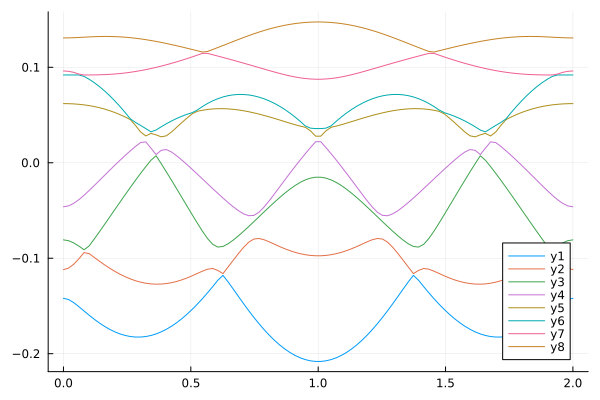

In [93]:
direction = [-3,-3,-1]*π/16
kvec = collect(range(0,2,100))
plot(kvec, reduce(hcat, [SpinonStructure.diagonalise_M(k*direction, A_ππ00, Jpm, magnetic_fields[1])[1] for k in kvec])')

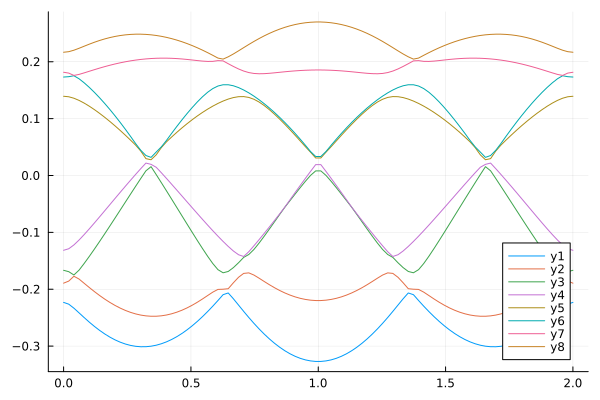

In [95]:
plot(kvec, reduce(hcat, [SpinonStructure.diagonalise_M(k*direction, A_ππ00, Jpm, magnetic_fields[4])[1] for k in kvec])')

In [83]:
?SimulationParameters

search: SimulationParameters



```
SimulationParameters
```

Members:     A::Matrix{Float64}     Jpm::Float64     B::Vec3_F64     λ::Float64     lat::geom.PyroFCC

Constructor:     SimulationParameters(;A, Jpm, B, nsample=10000,  kappa=1.0)     `A` is the emergent vector potential     `Jpm` and `B` are Hamiltonian parameters in units of `J_z`     `lat` is the lattice     `λ` is the emergent chemical potential.
